In [1]:
import numpy as np

In [2]:
pip install fuzzy-logic-toolbox

Note: you may need to restart the kernel to use updated packages.


In [3]:
import skfuzzy as fuzz

In [4]:
pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skfuzzy import control as ctrl

In [6]:
speed = ctrl.Antecedent(np.arange(0,2.5,0.1),'speed')
diaphragm = ctrl.Antecedent(np.arange(0,41,1),'diaphragm')
control_voltage = ctrl.Consequent(np.arange(110,231,1),'control voltage')

In [7]:
speed['slow'] = fuzz.trimf(speed.universe, [0,0,1.3])
speed['normal'] = fuzz.trimf(speed.universe, [0,1.3,2.5])
speed['rapid'] = fuzz.trimf(speed.universe, [1.3,2.5,2.5])

C:\Users\Alberto\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


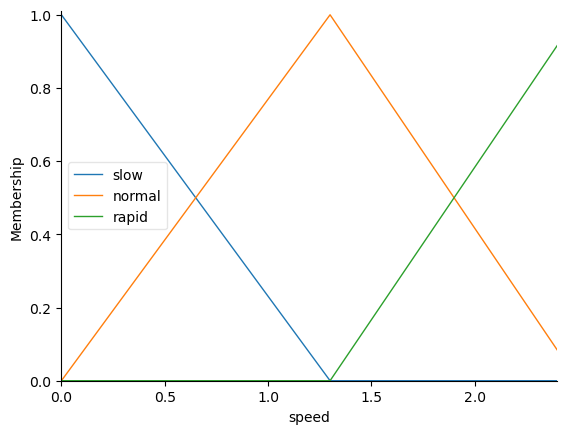

In [8]:
speed.view()

In [9]:
diaphragm['weak'] = fuzz.trimf(diaphragm.universe, [0,0,13])
diaphragm['medium'] = fuzz.trimf(diaphragm.universe, [0,13,27])
diaphragm['strong'] = fuzz.trimf(diaphragm.universe, [13,27,40])
diaphragm['very strong'] = fuzz.trimf(diaphragm.universe, [27,40,40])

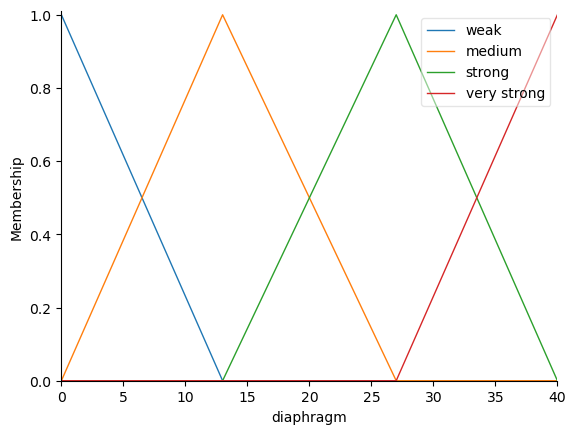

In [10]:
diaphragm.view()

In [11]:
control_voltage['very weak'] = fuzz.trimf(control_voltage.universe, [110,110,140])
control_voltage['medium'] = fuzz.trimf(control_voltage.universe, [110,140,170])
control_voltage['fairly strong'] = fuzz.trimf(control_voltage.universe, [140,170,200])
control_voltage['strong'] = fuzz.trimf(control_voltage.universe, [170,200,230])
control_voltage['very strong'] = fuzz.trimf(control_voltage.universe, [200,230,230])

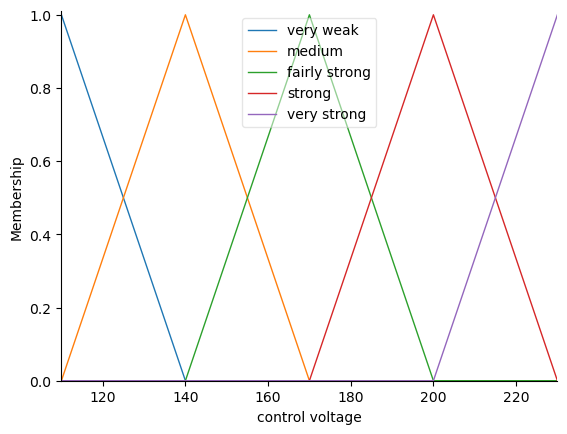

In [12]:
control_voltage.view()

In [13]:
rule1 = ctrl.Rule(speed['slow'] & diaphragm['weak'], control_voltage['strong'])
rule2 = ctrl.Rule(speed['normal'] & diaphragm['weak'], control_voltage['very strong'])
rule3 = ctrl.Rule(speed['rapid'] & diaphragm['weak'], control_voltage['very strong'])
rule4 = ctrl.Rule(speed['slow'] & diaphragm['medium'], control_voltage['medium'])
rule5 = ctrl.Rule(speed['normal'] & diaphragm['medium'], control_voltage['fairly strong'])
rule6 = ctrl.Rule(speed['rapid'] & diaphragm['medium'], control_voltage['very strong'])
rule7 = ctrl.Rule(speed['slow'] & diaphragm['strong'], control_voltage['very weak'])
rule8 = ctrl.Rule(speed['normal'] & diaphragm['strong'], control_voltage['medium'])
rule9 = ctrl.Rule(speed['rapid'] & diaphragm['strong'], control_voltage['very strong'])
rule10 = ctrl.Rule(speed['slow'] & diaphragm['very strong'], control_voltage['medium'])
rule11 = ctrl.Rule(speed['normal'] & diaphragm['very strong'], control_voltage['strong'])
rule12 = ctrl.Rule(speed['rapid'] & diaphragm['very strong'], control_voltage['very strong'])

In [14]:
vacuum_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

In [15]:
vacuum = ctrl.ControlSystemSimulation(vacuum_ctrl)

In [16]:
vacuum.input['speed'] = 1.6
vacuum.input['diaphragm'] = 22
vacuum.compute()

In [18]:
print(vacuum.output['control voltage'])

161.37259110369988


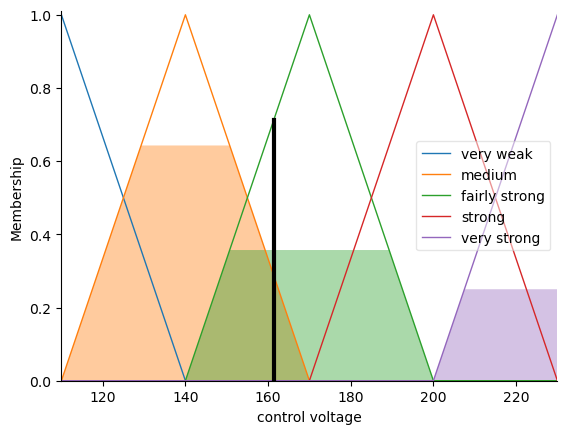

In [19]:
control_voltage.view(sim=vacuum)